# Scikit Learn: una libreria di algoritmi predittivi

Introduciamo oggi la libreria che useremo durante il corso per creare algoritmi predittivi.
Il materiale spiegato lo potete trovare anche sulla pagina web della libreria: (https://scikit-learn.org/stable/)[https://scikit-learn.org/stable/].

<a target="_blank" href="https://colab.research.google.com/github/zangobot/BusinessAnalytics_TeachingMaterial/blob/main/Esercitazione%202%20-%20Scikit%20Learn.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


In [3]:
try:
    import sklearn
except:
    !python3 -m pip install sklearn
print(sklearn.__version__)

Per chi lavora in locale, ricordate di installare la libreria da linea di comando.
Potete eseguire la cella sopra per installarlo nel vostro ambiente.

Tutti gli algoritmi predittivi in scikit-learn possiedono due metodi fondamentali:
* `fit` ossia il metodo che permette di allenare un modello predittivo sui dati
* `predict`ossia il metodo che permette di calcolare previsioni future

# Fit di classificatori

Prendiamo il dataset dei pinguini e alleniamo su di essi alcuni classificatori offerti dalla libreria.

In [9]:
import pandas as pd

data = pd.read_csv('dati/penguins_size.csv').dropna()
print(data.shape)

(334, 7)


Usiamo il classificatore K-Nearest Neighbors, ossia un algoritmo predittivo che prende decisioni in base ai punti vicini all'input.
<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_classification_001.png">

Nell'esempio (che andremo a riprodurre) potete vedere zone colorate in modo diverso: quelle sono le regioni in cui il classificatore decide la risposta in base ai punti presenti nell'area.
Facciamo ora la stessa cosa con i pinguini.
Usiamo solo due features, `culmen_length_mm` e `culmen_depth_mm` per predire la specie di pinguino.

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

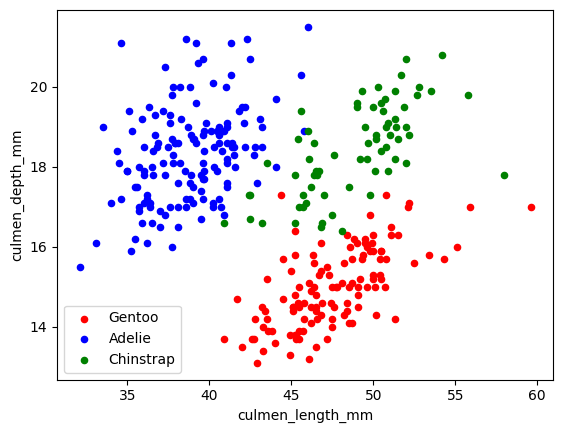

In [17]:
X = data[['culmen_length_mm', 'culmen_depth_mm']]
Y = data['species']

ax = data[data['species'] == 'Gentoo'].plot.scatter('culmen_length_mm', 'culmen_depth_mm', color='r', label='Gentoo')
data[data['species'] == 'Adelie'].plot.scatter('culmen_length_mm', 'culmen_depth_mm', ax=ax, color='b', label='Adelie')
data[data['species'] == 'Chinstrap'].plot.scatter('culmen_length_mm', 'culmen_depth_mm', ax=ax, color='g', label='Chinstrap')

Se voi voste un algoritmo predittivo, come dividereste lo spazio per separare al meglio le tre classi?
Vediamo come lo fa KNN:

In [18]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X, Y)

KNeighborsClassifier()

Andiamo a creare una visualizzazione del confine di decisione imparato dall'algoritmo.
Per farlo, usiamo queste funzioni già fatte per creare grafici di funzioni di decisioni in 2D.

/Users/zangobot/opt/miniconda3/envs/tai/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


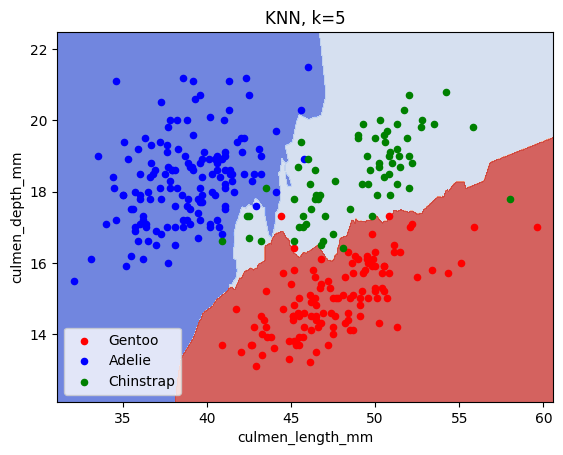

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, encoder, **params):
    Z = encoder.transform(clf.predict(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_decision_region(clf, X, Y, title, x_label, y_label):
    encoder = LabelEncoder().fit(Y)
    X0, X1 = X[x_label], X[y_label]
    xx, yy = make_meshgrid(X0, X1)
    fig, ax = plt.subplots()
    plot_contours(ax, clf, xx, yy, encoder, cmap=plt.cm.coolwarm, alpha=0.8)
    X[Y == 'Gentoo'].plot.scatter(x_label, y_label, ax=ax, color='r', label='Gentoo')
    X[Y == 'Adelie'].plot.scatter(x_label, y_label, ax=ax, color='b', label='Adelie')
    X[Y == 'Chinstrap'].plot.scatter(x_label, y_label, ax=ax, color='g', label='Chinstrap')
    ax.set_title(title)

plot_decision_region(knn, X, Y, f"KNN, k={k}", "culmen_length_mm", "culmen_depth_mm")

Come potete osservare, il classificatore divide lo spazio in relazione a come sono distribuiti i punti delle tre classi.
Notate qualcosa di strano? Vi sembra accurato?
Per capirlo, calcoliamo l'accuratezza del modello predittivo, ossia quanti punti sono stati classificati nel modo corretto.

In [42]:
from sklearn.metrics import accuracy_score

def compute_accuracy(clf, X):
    y_pred = clf.predict(X)
    accuracy = accuracy_score(Y, y_pred)
    print(f"L'accuratezza del modello è {accuracy:.2f}")
    print(f"Il modello classifica male il {1 - accuracy:.2f} % dei punti, ossia {int((1 - accuracy) * X.shape[0])} punti")

compute_accuracy(knn, X)

L'accuratezza del modello è 0.97
Il modello classifica male il 0.03 % dei punti, ossia 9 punti


Come possiamo migliorare questo risultato usando KNN? Aumentiamo k? Oppure riduciamo k?
Qual è l'effetto di k sul classificatore?

/Users/zangobot/opt/miniconda3/envs/tai/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


L'accuratezza del modello è 0.96
Il modello classifica male il 0.04 % dei punti, ossia 14 punti


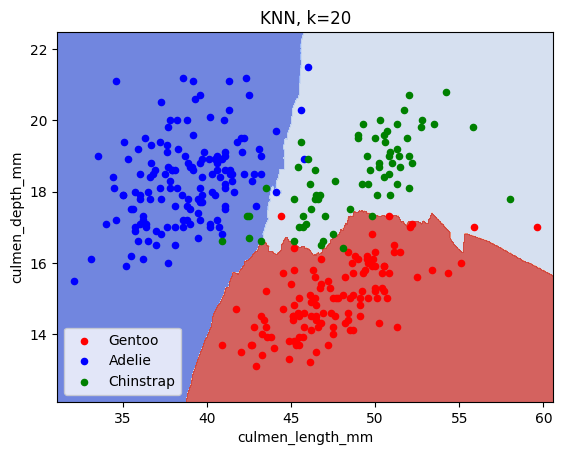

In [44]:
k = 20

knn20 = KNeighborsClassifier(n_neighbors=k)
knn20.fit(X, Y)
plot_decision_region(knn20, X, Y, f"KNN, k={k}", "culmen_length_mm", "culmen_depth_mm")
compute_accuracy(knn20, X)

/Users/zangobot/opt/miniconda3/envs/tai/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


L'accuratezza del modello è 1.00
Il modello classifica male il 0.00 % dei punti, ossia 0 punti


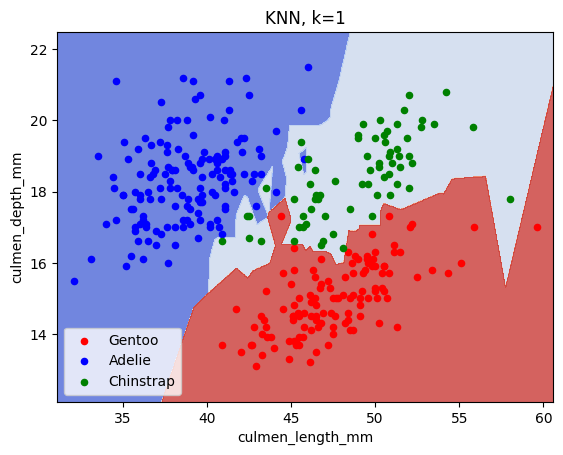

In [45]:
k = 1

knn1 = KNeighborsClassifier(n_neighbors=k)
knn1.fit(X, Y)
plot_decision_region(knn1, X, Y, f"KNN, k={k}", "culmen_length_mm", "culmen_depth_mm")
compute_accuracy(knn1, X)

Quale pensate sia la soluzione migliore? E perché?